##  Verileri Kaggleden ApıKey ile çekme

In [3]:
import pandas as pd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls

drive  sample_data


In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Sıtma Hastalığı veri Ve Ipnd dosyası CNN"



In [6]:
#changing the working directory
%cd "/content/drive/MyDrive/Sıtma Hastalığı veri Ve Ipnd dosyası CNN"
#Check the present working directory using pwd command

/content/drive/MyDrive/Sıtma Hastalığı veri Ve Ipnd dosyası CNN


In [7]:
!pwd

/content/drive/MyDrive/Sıtma Hastalığı veri Ve Ipnd dosyası CNN


In [8]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown
 47% 319M/675M [00:05<00:06, 56.7MB/s]
User cancelled operation


In [9]:
!ls

 cell_images   cell-images-for-detecting-malaria.zip  'Malaria CNN.ipynb'


In [10]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  cell-images-for-detecting-malaria.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of *.zip or
        *.zip.zip, and cannot find cell-images-for-detecting-malaria.zip.ZIP, period.

No zipfiles found.


# Malaria Datası ve Taransfer Learning 

In [4]:
path='/content/drive/MyDrive/Sıtma Hastalığı veri Ve Ipnd dosyası CNN/cell_images'

In [5]:
os.listdir(path)

['Parasitized', 'Uninfected', 'cell_images']

# Malaria

## Açıklama :📊 Malaria Veri Seti
Malaria veri seti, kan hücrelerinin mikroskopik görüntülerini içerir. Bu görüntüler, hücrelerin sağlıklı olup olmadığını veya Malaria gibi bir hastalığı gösterip göstermediğini belirlemek için kullanılır. Veri setiniz, bu görüntüleri çeşitli sınıflara ayırmak için kullanılacak.

## 🚀 Ne Yapacağız?
Veri Kümesini Küçültme:

14,000 görüntüden sadece 1,500'ünü seçeceğiz. Bu, eğitim sürecini hızlandıracak ve daha iyi performans elde etmenize yardımcı olacak.
Model Eğitimi:

VGG19 modelini kullanarak eğitimi gerçekleştireceğiz. VGG19, önceden eğitilmiş ağırlıklarıyla güçlü bir görüntü sınıflandırma modelidir.
Modeli, bu küçük veri kümesi ile eğitecek ve Malaria'nın doğru sınıflandırılması için iyileştireceğiz.



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import cv2
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

path='/content/drive/MyDrive/Sıtma Hastalığı veri Ve Ipnd dosyası CNN/cell_images/cell_images'

In [7]:
def create_dataset(folders, path, max_images_per_label=1250):
    data = {'imgpath': [], 'labels': []}

    for folder in folders:
        folderpath = os.path.join(path, folder)
        files = os.listdir(folderpath)

        # Her bir klasörden sadece max_images_per_label kadar görsel alıyoruz
        selected_files = files[:max_images_per_label]

        for file in selected_files:
            filepath = os.path.join(folderpath, file)
            data['imgpath'].append(filepath)
            data['labels'].append(folder)

    dataset = pd.DataFrame(data)
    return dataset

In [8]:
import os

sınıf=os.listdir(path)  # Kolon adlarımız
num_classes = len(os.listdir(path))
print('Sınıflarımız: ',sınıf,'\nSınıf sayisi:',num_classes)

Sınıflarımız:  ['Parasitized', 'Uninfected'] 
Sınıf sayisi: 2


In [9]:
folders1 = ['Parasitized', 'Uninfected']
df=create_dataset(folders1,path)
df.head()

,imgpath,labels
0,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized
1,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized
2,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized
3,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized
4,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Etiketleri sayısal değerlere dönüştür
df['encode_label'] = encoder.fit_transform(df['labels'])

In [11]:
df.head()

,imgpath,labels,encode_label
0,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized,0
1,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized,0
2,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized,0
3,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized,0
4,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Parasitized,0


## Yerlerini değiştirelim


In [12]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,imgpath,labels,encode_label
0,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Uninfected,1
1,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Uninfected,1
2,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Uninfected,1
3,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Uninfected,1
4,/content/drive/MyDrive/Sıtma Hastalığı veri V...,Uninfected,1


In [13]:
df.info()
## Her Birinden 7000 tane almış olduk

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   imgpath       2500 non-null   object
 1   labels        2500 non-null   object
 2   encode_label  2500 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 58.7+ KB


# Görselleştirme

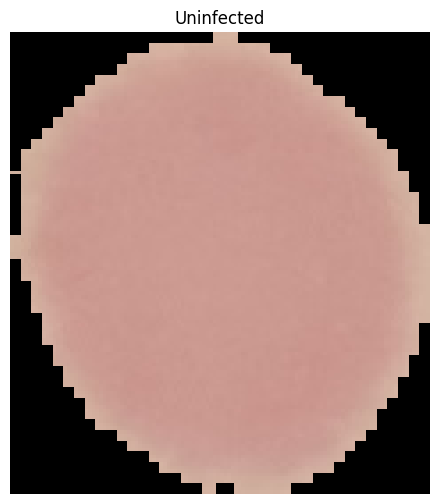

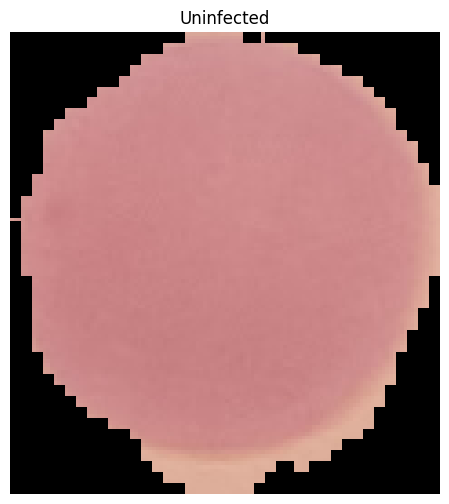

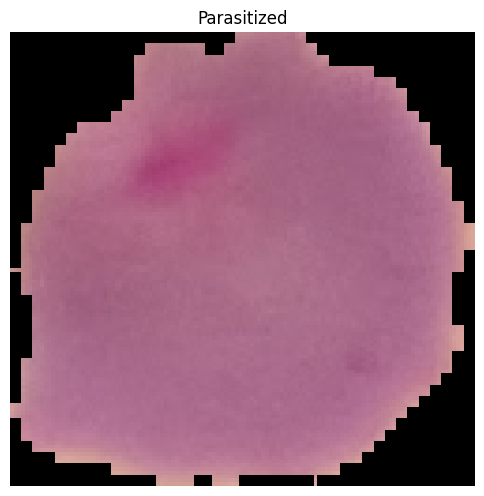

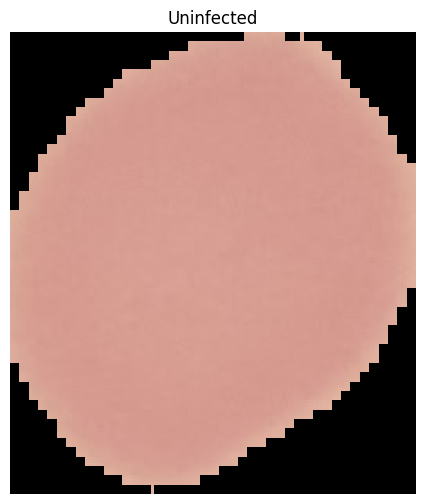

In [14]:
import cv2
import matplotlib.pyplot as plt
for index, row in df.sample(4).iterrows():
    # Resmi yükle
    img = cv2.imread(row['imgpath'])

    # OpenCV resmi RGB formatına dönüştür
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resmi matplotlib ile göster
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.title(row['labels'])
    plt.axis('off')
    plt.show()

In [15]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import plotly.express as px

sayi = df['labels'].value_counts() #hurma türe göre sayisi

# Plotly ile hurma dağılımını görselleştirme
fig=px.bar(x=sayi.index,  #6 indexi var
           y=sayi.values, # sayisi
           color=sayi.index, # rekleri yine sayisina göre
           labels={'x': 'Çeşitler','y': 'Toplam Sayı'}, #label yazdırma
           title='Sıtma Çeşitleri Grafiği', #başlık
           template='plotly_dark') # arkapılan

fig.show()


fig = px.pie(names=sayi.index,
             values=sayi.values,
             title='Sıtma Dağılımı',
             labels={'names': 'Sıtma',
                     'values': 'Toplam Sayı'},
             template='plotly_white')
fig.show()

<img src='https://www.mdpi.com/agriculture/agriculture-11-00707/article_deploy/html/images/agriculture-11-00707-g004.png'>

In [16]:
df.columns

Index(['imgpath', 'labels', 'encode_label'], dtype='object')

In [17]:
from PIL import Image

# Görselin yolu
img_path=df['imgpath'][86]
# Görseli aç
img = Image.open(img_path)

# Görsel boyutlarını öğren
width, height = img.size

print(f'Görsel boyutları: {width} x {height}')


Görsel boyutları: 118 x 127


# Normalizasyon

In [18]:
import numpy as np
x=[]
for img in df['imgpath']:
    try:
        img = cv2.imread(img)
        img = cv2.resize(img, (128, 128))# 128 pixle boyutunda
        img = img / 255.0  # normalize etmee
        x.append(img)      # img

    except:
        print(f"Error loading image: {img}")

In [19]:
x=np.array(x)
y=df['encode_label']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

x_train.shape,x_test.shape

((1875, 128, 128, 3), (625, 128, 128, 3))

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [21]:
model = models.Sequential()

# Evrişimsel katmanlar(Conv) ve havuzlama(pooling) katmanları

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))   # overfiting yapasın diye bazı değerleri atıyoruz dropout ile

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Düzleştirme ve tam bağlı katmanlar
model.add(layers.Flatten())  # düzleştirme

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))  # Yüksek dropout oranı, tam bağlı katmanlarda aşırı öğrenmeyi azaltabilir
model.add(layers.Dense(2, activation='softmax'))  # Çıkış katmanı: 2 sonucumuz var  sınıf için # çeşit sayımıza göre

# Modeli derleme
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

In [22]:
import warnings
warnings.filterwarnings('ignore')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=150)


Epoch 1/30
13/13 [==============================] - 11s 299ms/step - loss: 0.7357 - accuracy: 0.4917 - val_loss: 0.6930 - val_accuracy: 0.5056
Epoch 2/30
13/13 [==============================] - 1s 106ms/step - loss: 0.6930 - accuracy: 0.5083 - val_loss: 0.6929 - val_accuracy: 0.5056
Epoch 3/30
13/13 [==============================] - 1s 114ms/step - loss: 0.6902 - accuracy: 0.5237 - val_loss: 0.6933 - val_accuracy: 0.5056
Epoch 4/30
13/13 [==============================] - 1s 114ms/step - loss: 0.6873 - accuracy: 0.5419 - val_loss: 0.6929 - val_accuracy: 0.5056
Epoch 5/30
13/13 [==============================] - 1s 108ms/step - loss: 0.6786 - accuracy: 0.5781 - val_loss: 0.6771 - val_accuracy: 0.6336
Epoch 6/30
13/13 [==============================] - 1s 109ms/step - loss: 0.6817 - accuracy: 0.5397 - val_loss: 0.6712 - val_accuracy: 0.5376
Epoch 7/30
13/13 [==============================] - 1s 108ms/step - loss: 0.6320 - accuracy: 0.6368 - val_loss: 0.6216 - val_accuracy: 0.6016
Epoch

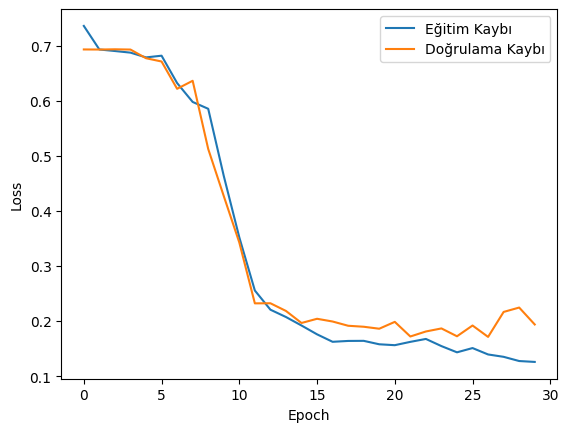

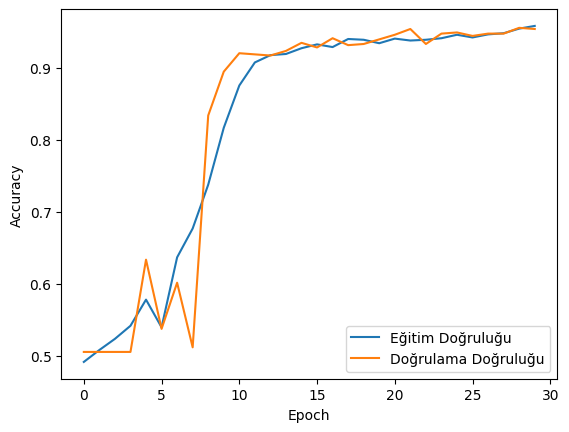

In [23]:
# Eğitim ve Doğrulama Kaybı
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Eğitim ve Doğrulama Doğruluğu
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [24]:
loss,acc=model.evaluate(x_test,y_test)
acc

20/20 [==============================] - 1s 25ms/step - loss: 0.1939 - accuracy: 0.9536


0.9535999894142151

20/20 [==============================] - 0s 8ms/step


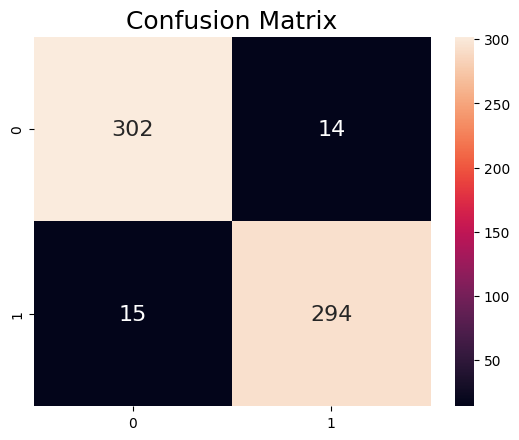

In [25]:
predict=model.predict(x_test)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np


sns.heatmap(confusion_matrix(y_test, np.argmax(predict, axis=1)), annot=True, fmt='d', annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [28]:
model.save('MalariaModel95.h5')

# VGG - 16 ile

In [30]:
import os
import shutil
import random

def create_small_dataset(source_dir, target_dir, target_size):
    classes = os.listdir(source_dir)
    for cls in classes:
        os.makedirs(os.path.join(target_dir, cls), exist_ok=True)

    for cls in classes:
        cls_path = os.path.join(source_dir, cls)
        all_files = os.listdir(cls_path)
        sample_files = random.sample(all_files, min(len(all_files), target_size // len(classes)))

        for file_name in sample_files:
            shutil.copy(os.path.join(cls_path, file_name), os.path.join(target_dir, cls, file_name))

# Kaynak ve hedef dizinler
source_path = '/content/drive/MyDrive/Sıtma Hastalığı veri Ve Ipnd dosyası CNN/cell_images/cell_images'
small_dataset_path = '/content/drive/MyDrive/Sıtma Hastalığı veri Ve Ipnd dosyası CNN/cell_images/small_dataset'
create_small_dataset(source_path, small_dataset_path, 1500)


In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Verileri hazırlama
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    small_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    small_dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# VGG19 modelini yükleme (önceden eğitilmiş ağırlıklarla)
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Modelin üst kısmını oluşturma
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Yeni model
model = Model(inputs=base_model.input, outputs=predictions)

# Önceden eğitilmiş katmanları dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/10
46/46 [==============================] - 31s 556ms/step - loss: 0.8565 - accuracy: 0.6587 - val_loss: 0.5083 - val_accuracy: 0.8159
Epoch 2/10
46/46 [==============================] - 25s 552ms/step - loss: 0.4796 - accuracy: 0.7841 - val_loss: 0.4367 - val_accuracy: 0.7840
Epoch 3/10
46/46 [==============================] - 22s 472ms/step - loss: 0.3916 - accuracy: 0.8317 - val_loss: 0.3565 - val_accuracy: 0.8512
Epoch 4/10
46/46 [==============================] - 23s 493ms/step - loss: 0.3297 - accuracy: 0.8651 - val_loss: 0.3094 - val_accuracy: 0.8838
Epoch 5/10
46/46 [==============================] - 25s 552ms/step - loss: 0.3113 - accuracy: 0.8733 - val_loss: 0.2852 - val_accuracy: 0.8832
Epoch 6/10
46/46 [==============================] - 22s 481ms/step - loss: 0.2888 - accuracy: 0.8753 - val_loss: 0.2610 - val_accuracy: 

In [33]:
model.save('MalariaModelVGG19.h5')

# Sonuç olarak  Modellerimiz CNN ile Hemde VGG19 ile başarılı bir sonuca getirebildik  accuracy 91 VGG19 için